In [2]:
import torch
import numpy as np
import xarray as xr
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
ds = xr.open_dataset(Path.home() / 'research_data/GLP/synthetic_data/init_ds.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:   (p: 10000, x: 128, y: 128)
Coordinates:
  * x         (x) int32 0 1 2 3 4 5 6 7 8 ... 120 121 122 123 124 125 126 127
  * y         (y) int32 0 1 2 3 4 5 6 7 8 ... 120 121 122 123 124 125 126 127
Dimensions without coordinates: p
Data variables:
    ellipse   (p, x, y) float64 ...
    maj_len   (p) float64 ...
    min_len   (p) float64 ...
    angle     (p) float64 ...
    center_x  (p) float64 ...
    center_y  (p) float64 ...

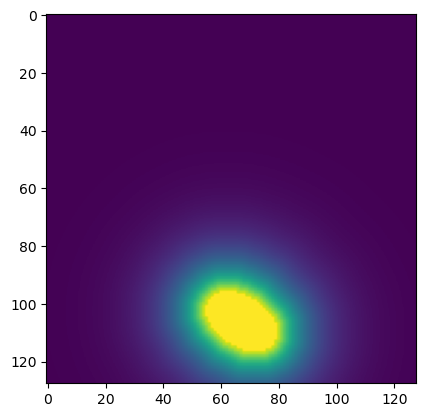

In [13]:
plt.imshow(ds.ellipse[0, :, :].values)

In [16]:
cuda_gpu = torch.device('cuda:0')
train_ds = torch.tensor(ds.ellipse[0:8000, :, :].values, device=cuda_gpu)
train_y = torch.tensor(np.vstack([ds.maj_len[0:8000].values, ds.min_len[0:8000].values]).T)
val_ds = torch.tensor(ds.ellipse[8000:, :, :].values, device=cuda_gpu)
val_y = torch.tensor(np.vstack([ds.maj_len[8000:].values, ds.min_len[8000:].values]).T)